In [10]:
import pandas
import datetime
import time
import feather
import os
import sys
module_path = os.path.abspath(os.path.join('../data_pipeline/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import create_onset_data
# plotting imports
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
onsetDF = feather.read_dataframe("../data/binned_data.feather")
onsetDF.head()

,bin_0,bin_1,bin_2,date
0,0,0,1,1996-03-30 04:11:00
1,0,0,1,1996-03-30 04:12:00
2,0,0,1,1996-03-30 04:13:00
3,0,0,1,1996-03-30 04:14:00
4,0,0,1,1996-03-30 04:15:00


In [15]:
# we'll convert the bins into binary out
def onset_binary(row):
    b1 = row["bin_0"]
    b2 = row["bin_1"]
    b3 = row["bin_2"]
    row["out"] = int(str(b3) + str(b2) + str(b1), 2)
    return row

In [16]:
onsetDF = onsetDF.apply( onset_binary, axis=1 )
onsetDF.head()

,bin_0,bin_1,bin_2,date,out
0,0,0,1,1996-03-30 04:11:00,4
1,0,0,1,1996-03-30 04:12:00,4
2,0,0,1,1996-03-30 04:13:00,4
3,0,0,1,1996-03-30 04:14:00,4
4,0,0,1,1996-03-30 04:15:00,4


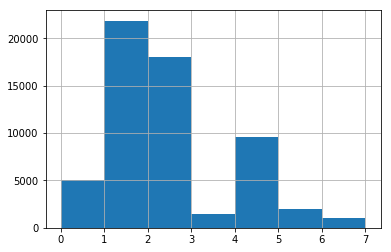

In [17]:
bins = [0,1,2,3,4,5,6,7]
onsetDF["out"].hist(bins=bins)